Please make sure while evaluating that your internet connection if fast and reliable

In [42]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
import operator
import time
driver=webdriver.Chrome(executable_path='################')   #path to chrome WebBrowser

In [43]:
#convert a string into an integer
def concatenate_list_data(list):
    result= ''
    for element in list:
        result += str(element)
    return result

In [44]:
#This will open Instagram Tab
driver.get('https://www.instagram.com/')


wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.NAME,'username')))
############Enter the login credentials ###################
username = driver.find_element_by_name('username')
password = driver.find_element_by_name('password')
username.send_keys('###########')  #######USERNAME
password.send_keys('###########')  #######PASSWORD

#Click the submit button
driver.find_element_by_tag_name('button').submit()
#After clicking the submit button wait for the sometime
#Then disable the pop up of (Turn Off Notification)
wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//button[contains(@class,"HoLwm")]')))
wait.click()



In [45]:
#Click on the search button
#Enter the word ="food" and then press enter 
#Wait for sometime till the names are dispalyed after typing “food
search_btn=driver.find_element_by_class_name('LWmhU').click()
search_box=driver.find_element_by_class_name('XTCLo')
search_box.send_keys('food')

In [46]:
#get the all the instaHandles of with keyword "food"
food_blogger=[]
for i in driver.find_elements_by_xpath('//a[contains(@class,"yCE8d")]/div/div[2]/div/span'):
    if i.get_attribute('innerHTML')!='food':
        food_blogger.append(i.get_attribute('innerHTML'))

In [47]:
food_blogger

['foodtalkindia',
 'foodie_incarnate',
 '_.foodie_woodie._',
 'dilsefoodie',
 'yourfoodlab',
 'foodgod',
 'foodie_claws',
 'foodbloggerai',
 'foodhallcookerystudio',
 'foodinsider',
 'foodcookery',
 'foodkhabri',
 'buzzfeedfood',
 'ndtv_food',
 'foodishak',
 'foodfoodtv',
 'thevegbook',
 'meghnasfoodmagic',
 'hungrytonight',
 'the.foodgasm.company',
 'delhifoodwalks',
 'foodnetwork',
 'rajshrifood',
 'hungrysincebirth',
 'thefoodshark',
 'foodnetworkkitchen',
 'dillifoodies',
 'foodiesince96',
 'bigbazaarfood',
 'foodmapdelhi',
 'sailusfood',
 'archisha_tripathi',
 'scrollfood',
 'delhifoodblogger',
 'foodgrambyami',
 'thefoodattacker',
 'foodiecouple_parvan',
 'foodhallindia',
 'livingfoodz',
 'lizza',
 'hmm_nikhil',
 'geetasfoodielife',
 'foodlamour',
 '_fooddict',
 'food_ft_love',
 'fooddreamer',
 'moody_without_foody',
 'foodin.dextin',
 'bond.over.food',
 'foodophoric',
 'sorrentinabyfoodhall',
 'Horn Ok Please - Food Truck Festival']

In [48]:
#clear the search result
driver.find_element_by_class_name('coreSpriteSearchClear').click()


In [52]:
#########create a dictionary of no of followers#######
d={}
i=0
while i < (len(food_blogger)):
    try:
        #click on the search button 
        wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"MWDvN")]/div[2]')))
        wait.click()
        #enter the name from list food_blogger
        wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"MWDvN")]/div[2]/input')))
        wait.send_keys(food_blogger[i])
        #click on the first search result and wait till the website is opened
        wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"drKGC")]/div/a')))
        wait.click()
        
        #extract the number of followers of that insta handles
        wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//a[contains(@class,"-nal3")]/span')))
        no_of_followers=wait.get_attribute('title')
        #add them into the dictionary after converting no of followers into an integer into a dictionary( d )
        ans=concatenate_list_data(no_of_followers.split(","))
        time.sleep(1)
        d[food_blogger[i]]=int(ans)
        #as we have to extract only first 10 insta handles
        i+=1
        if len(d)==10:
            break
    except TimeoutException :
        i+=1
        pass

        

In [53]:
#sort all the handles in descending order in respect to their no of followers
sorted_dict=dict(sorted(d.items(),key=operator.itemgetter(1),reverse=True))
sorted_dict

{'foodgod': 3597235,
 'foodie_claws': 3597235,
 'foodinsider': 2180195,
 'yourfoodlab': 1123345,
 'dilsefoodie': 429744,
 'foodtalkindia': 295081,
 'foodie_incarnate': 179168,
 'foodhallcookerystudio': 64624,
 'foodbloggerai': 1298,
 '_.foodie_woodie._': 307}

In [54]:
#extract the first five most followed insta handles and store them into a dictionary ( first_5_top_followers )
first_5_top_followers=[]
for i in sorted_dict:
    first_5_top_followers.append(i)
    if len(first_5_top_followers)==5:
        break
first_5_top_followers    

['foodgod', 'foodie_claws', 'foodinsider', 'yourfoodlab', 'dilsefoodie']

In [55]:
#find the number of posts first_5_top_followers handles have posted in last 3 days.
def get_no_of_post(word):
    
    #click on the search button 
    wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"MWDvN")]/div[2]')))
    wait.click()
    #enter the name from list food_blogger
    wait=WebDriverWait(driver,5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"MWDvN")]/div[2]/input')))
    wait.send_keys(word)
    #click on the first search result and wait till the website is opened
    wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"drKGC")]/div/a')))
    wait.click()
    
    #selecting the first post of the handle
    wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"kIKUG ")]')))
    wait.click()
    
    i=0
    wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"k_Q0X")]/a/time')))   
    #iterating over all the post that have been posted in previous 3 days 
    #calculating the number of post from each insta handle
    while wait.get_attribute('innerHTML')[0] < '4' or wait.get_attribute('innerHTML')[2] =='h' :
        i+=1
        #pressing the next button
        wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//a[contains(@class,"coreSpriteRightPaginationArrow")]')))
        wait.click()
        wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"k_Q0X")]/a/time')))

    driver.find_element_by_xpath('//div[contains(@class,"CkGkG")]/div[3]/button').click()
    return i
    

In [56]:

#storing the number of posts that have been posted by these handles in previous 3 days in a dictionary ( dic_for_no_of_post)
dic_for_no_of_post={}
for i in first_5_top_followers:
    dic_for_no_of_post[i]=get_no_of_post(i)
dic_for_no_of_post 

{'foodgod': 0,
 'foodie_claws': 0,
 'foodinsider': 3,
 'yourfoodlab': 5,
 'dilsefoodie': 4}

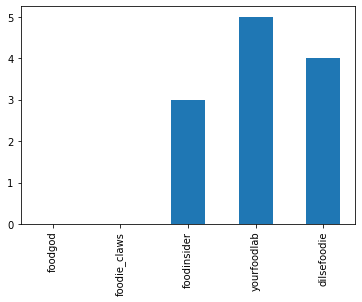

In [57]:
#Plotting the bar graph showing the number of posts that these handles have posted in the last 3 days. 
import matplotlib.pyplot as plt
x=list(dic_for_no_of_post.keys())
y=list(dic_for_no_of_post.values())
plt.bar(x,y,width=0.5)
plt.xticks(rotation=90)
plt.show()

In [58]:
def scraped_handled(handle):
    
    #click on the search button 
    wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"MWDvN")]/div[2]')))
    wait.click()
    #enter the name from list food_blogger
    wait=WebDriverWait(driver,5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"MWDvN")]/div[2]/input')))
    wait.send_keys(handle)
    #click on the first search result and wait till the website is opened
    wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"drKGC")]/div/a')))
    wait.click()
    
    hashtags=[]
    content=[]
    #selecting the first post
    wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"kIKUG ")]')))
    wait.click()
    i=1
    while i<=10:
        #extracting all hashtags and other content in hashtags and content lists respectively
        for k in driver.find_elements_by_xpath('//div[contains(@class,"C4VMK")]/span/a'):
            hashtags.append(k.get_attribute('innerHTML'))
       
        for j in driver.find_elements_by_xpath('//div[contains(@class,"C4VMK")]/span'):
            content.append(j.get_attribute('textContent'))
        
        i+=1
        #clicking on the next post
        wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//a[contains(@class,"coreSpriteRightPaginationArrow")]')))
        wait.click()
        wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"k_Q0X")]/a/time')))
    
    driver.find_element_by_xpath('//div[contains(@class,"CkGkG")]/div[3]/button').click()
    
    #printing the content of each handle
    print("Content for ",handle,"is :")
    for i in content:
        print(i)
        print("--------------------------------------------------------------")
    print("=================================================================")
    
    return hashtags
    

In [59]:
#scrape the content and hashtags of the first 10 posts of each handle

li_of_hashtags=[]
for i in first_5_top_followers:
    li_of_hashtags.append(scraped_handled(i))
li_of_hashtags

Content for  foodgod is :
Should this be a dark, milk, or white chocolate pool??⁣⁣📹@mrhalawa
--------------------------------------------------------------
Omg yum!!
--------------------------------------------------------------
Milk always 🤎🤎🤎
--------------------------------------------------------------
Dark always!
--------------------------------------------------------------
🍦
--------------------------------------------------------------
Yum!!! I would go with milk chocolate 🍩🤤
--------------------------------------------------------------
Now how do you hold it?
--------------------------------------------------------------
🍦
--------------------------------------------------------------
🍦
--------------------------------------------------------------
I'm your daily reminder. My job is to remind you everyday that you're beautiful❤
--------------------------------------------------------------
I love some white chocolate 😍🔥🔥
------------------------------------------------------

Content for  foodie_claws is :
What’s better solution to this blazing weather than this spl lassi at #cannaughtplace #hanumanmandir ...#lassi #foodie #food #delicious #instafood #milkshake #sweetyogurt #sweetyogurtdrink #indiandrinks #curd #healthylassi #healthyfood #newfood #beattheheat #lassicache #bestlassi
--------------------------------------------------------------
😍😍
--------------------------------------------------------------
Kulhar wali lassi 😍😍
--------------------------------------------------------------
👍
--------------------------------------------------------------
👍
--------------------------------------------------------------
Just drink and cool down. 👌
--------------------------------------------------------------
Amazing❤️
--------------------------------------------------------------
Wow I’d love to tuck into that right now ☺️
--------------------------------------------------------------
Yummy
--------------------------------------------------------------
🤤🤤🤤🤤


Content for  yourfoodlab is :
Healthy Paneer Makhani with @californiawalnutsindia Today to celebrate walnut day I cooked some healthy paneer makhani live! It was an amazing cook along & the idea to cook this recipe was to learn how we can make subtle changes in our loved recipes to make them healthier for daal to day consumption. Usually. The makhani gravy is cooked with a lot of cream & butter but I have made this recipe by using just 1 tsp of ghee & butter &. replacing cream by curd, also the walnuts make the gravy so rich & creamy. You can add California walnuts to many savoury dishes too, like pastas, salads, chutneys, chaats & gravies. Do try this recipe & upload the picture by tomorrow to stand a chance to win exciting prizes. You just have to tag @yourfoodlab & @californiawalnutsindia while uploading the picture on Instagram & Facebook. You can enter into the competition by 18/05/2020 6:00 pm IST. Looking forward for your entries & cook healthy and live healthy with California w

Content for  dilsefoodie is :
Simple Punjabi Dal TadkaAnyone Here Who Love Simple Dal Tadka ? #dilsefoodie #daltadka
--------------------------------------------------------------
Mast lag rahi hai dekhna ma toh😍😍😍😍😍
--------------------------------------------------------------
😍
--------------------------------------------------------------
😍😍
--------------------------------------------------------------
😍
--------------------------------------------------------------
Looks yum 😋 😋
--------------------------------------------------------------
Looks Yummy 😋 Good Job♥️
--------------------------------------------------------------
Bhai yaar itni tasty recipe kaha se lata hai😍
--------------------------------------------------------------
Look so beautiful😋👍
--------------------------------------------------------------
😍😋😍😋
--------------------------------------------------------------
Can you write the recipt in english?
--------------------------------------------------------------

[['@mrhalawa',
  '@vodkabeluga',
  '#fitness',
  '#gym',
  '#workout',
  '#fit',
  '#foodgod',
  '#fitnessmotivation',
  '#motivation',
  '#food',
  '#training',
  '#health',
  '#fitfam',
  '#vodka',
  '#staystrong',
  '#diy',
  '@mountsinaimedicalcenter',
  '@umiamihealth',
  '@adameljamal1',
  '#giveback',
  '#foodgod',
  '#dogood',
  '#helpingothers',
  '#youmatter',
  '#staycalm',
  '#bepatient',
  '#staystrong',
  '#staypositive',
  '#bestrong',
  '#dontgiveup',
  '#wecandothis',
  '#miami',
  '#strawberry',
  '#dessertoftheday',
  '#dessertheaven',
  '#foodlovers',
  '#dessertlover',
  '#sweettooth',
  '#yumm',
  '#dessert',
  '#yummy',
  '#foodgod',
  '#sweets',
  '#uk',
  '#chocolate',
  '@four_cups',
  '@edimdoma.ru',
  '@thenbhd',
  '@rosiezoey',
  '@conchiita_rebecca',
  '@hannahmcl1',
  '@garrett.mcgrath',
  '@vanessabakes',
  '@jade_sweet_1',
  '@squeakycahlean',
  '@amiemc93',
  '@sheltobes',
  '@arisha7252',
  '@rskuls1',
  '@mylesprime112',
  '@fatjoe',
  '@therealnorea

In [60]:
#removing all unnecessary tags and keeping only hashtags and storing the hashtags in list ( words )
words=[]
for i in range(5):
    for j in li_of_hashtags[i]:
        if j[0]=="@" or j[0]=="":
            pass
        else:
            words.append(j)


In [61]:
#prepairing a dictionary ( dic ) having the frequency of each hashtag
dic={}
for i in words:
    if i in dic:
        dic[i]+=1
    else:
        dic[i]=1
dic

{'#fitness': 1,
 '#gym': 1,
 '#workout': 1,
 '#fit': 1,
 '#foodgod': 3,
 '#fitnessmotivation': 1,
 '#motivation': 1,
 '#food': 19,
 '#training': 1,
 '#health': 1,
 '#fitfam': 1,
 '#vodka': 1,
 '#staystrong': 2,
 '#diy': 1,
 '#giveback': 1,
 '#dogood': 1,
 '#helpingothers': 1,
 '#youmatter': 1,
 '#staycalm': 1,
 '#bepatient': 1,
 '#staypositive': 1,
 '#bestrong': 1,
 '#dontgiveup': 1,
 '#wecandothis': 1,
 '#miami': 1,
 '#strawberry': 1,
 '#dessertoftheday': 1,
 '#dessertheaven': 1,
 '#foodlovers': 1,
 '#dessertlover': 1,
 '#sweettooth': 1,
 '#yumm': 1,
 '#dessert': 2,
 '#yummy': 9,
 '#sweets': 1,
 '#uk': 1,
 '#chocolate': 2,
 '#followme': 1,
 '#sdvtodos': 1,
 '#cannaughtplace': 1,
 '#hanumanmandir': 1,
 '#lassi': 1,
 '#foodie': 17,
 '#delicious': 9,
 '#instafood': 8,
 '#milkshake': 1,
 '#sweetyogurt': 1,
 '#sweetyogurtdrink': 1,
 '#indiandrinks': 1,
 '#curd': 1,
 '#healthylassi': 1,
 '#healthyfood': 1,
 '#newfood': 1,
 '#beattheheat': 1,
 '#lassicache': 1,
 '#bestlassi': 1,
 '#chaicoffe

In [62]:
#sorting all the hashtags on the bases of their frequency in descending order
sorted_dic=dict(sorted(dic.items(),key=operator.itemgetter(1),reverse=True))
sorted_dic

{'#food': 19,
 '#foodie': 17,
 '#foodporn': 10,
 '#dilsefoodie': 10,
 '#yummy': 9,
 '#delicious': 9,
 '#instafood': 8,
 '#foodgasm': 8,
 '#foodphotography': 7,
 '#foodstagram': 7,
 '#FoodInsider': 7,
 '#stayhome': 7,
 '#staysafe': 7,
 '#indiancuisine': 7,
 '#tasty': 6,
 '#foodblogger': 5,
 '#foodlover': 4,
 '#foodies': 4,
 '#nsp': 4,
 '#love': 4,
 '#yum': 4,
 '#recipe': 4,
 '#streetfood': 4,
 '#foodgod': 3,
 '#pitampura': 3,
 '#instagood': 3,
 '#foodie_claws': 3,
 '#cheese': 3,
 '#eat': 3,
 '#hungry': 3,
 '#staystrong': 2,
 '#dessert': 2,
 '#chocolate': 2,
 '#paneer': 2,
 '#italian': 2,
 '#bread': 2,
 '#sandwich': 2,
 '#fastfood': 2,
 '#like': 2,
 '#fries': 2,
 '#nomnom': 2,
 '#huffposttaste': 2,
 '#f52grams': 2,
 '#buzzfeed': 2,
 '#fitness': 1,
 '#gym': 1,
 '#workout': 1,
 '#fit': 1,
 '#fitnessmotivation': 1,
 '#motivation': 1,
 '#training': 1,
 '#health': 1,
 '#fitfam': 1,
 '#vodka': 1,
 '#diy': 1,
 '#giveback': 1,
 '#dogood': 1,
 '#helpingothers': 1,
 '#youmatter': 1,
 '#staycalm': 

In [63]:
#printing the 10 most popular hashtags
print("Most popular Hashtags are:")
j=0
for i in sorted_dic:
    print(i)
    j+=1
    if j==10:
        break

Most popular Hashtags are:
#food
#foodie
#foodporn
#dilsefoodie
#yummy
#delicious
#instafood
#foodgasm
#foodphotography
#foodstagram


In [64]:
# Creating a csv having list of all words used in the scraped posts and the frequency of each word.
import pandas as pd
df=pd.DataFrame()
df['Words']=list(sorted_dic.keys())
df['Frequency']=list(sorted_dic.values())
df.to_csv("Hashtags_Frequency.csv")

In [65]:
#printing the top 5 most popular hashtags among these bloggers
j=0
x_axis,y_axis=[],[]
for i in sorted_dic:
    x_axis.append(i)
    y_axis.append(sorted_dic[i])
    print("Hashtag",i ,' was used',sorted_dic[i],' times')
    j+=1
    if j==5:
        break

Hashtag #food  was used 19  times
Hashtag #foodie  was used 17  times
Hashtag #foodporn  was used 10  times
Hashtag #dilsefoodie  was used 10  times
Hashtag #yummy  was used 9  times


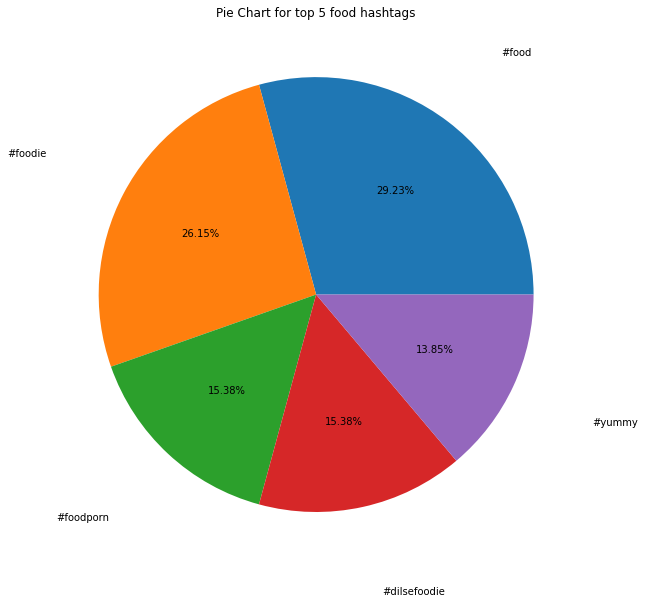

In [66]:
#Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.
plt.figure(figsize=(10,10))
plt.pie(y_axis,labels=x_axis,autopct='%.2f%%',labeldistance=1.4)
plt.title("Pie Chart for top 5 food hashtags")
plt.show()

In [74]:
def followers_like_ratio(like,follow):
    sum=0
    for i in like:
        sum+=i
    avg=sum/len(likes)
    return (follow/avg)

In [75]:
def get_likes_and_followers(handle):
     #click on the search button 
    wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"MWDvN")]/div[2]')))
    wait.click()
        #enter the name from list food_blogger
    wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"MWDvN")]/div[2]/input')))
    wait.send_keys(handle)
        #click on the first search result and wait till the website is opened
    wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"drKGC")]/div/a')))
    wait.click()
    #extract the number of followers of that insta handles
    
    wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//a[contains(@class,"-nal3")]/span')))
    no_of_followers=wait.get_attribute('title')
    #add them into the dictionary after converting no of followers into an integer into a dictionary( d )
    ans=concatenate_list_data(no_of_followers.split(","))
        #storing the no of followers in the followers list
    followers=int(ans)
    likes=[]
    
    #selecting the first post
    wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"kIKUG ")]')))
    wait.click()
    
    
    i=1
    while i < 15:
        try:
            wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"HbPOm")]/span/span')))
        except TimeoutException :
            wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"Nm9Fw")]/button/span')))

        temp=wait.get_attribute('innerHTML')
        ans=concatenate_list_data(temp.split(","))
        likes.append(int(ans))
        wait=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//a[contains(@class,"coreSpriteRightPaginationArrow")]')))
        wait.click()
        i+=1

        
    driver.find_element_by_xpath('//div[contains(@class,"CkGkG")]/div[3]/button').click()
    
    sorted_list=sorted(likes,reverse=True)
    
    return sorted_list[0:10],followers

In [78]:
#calculate the average followers : likes ratio for the obtained handles.
ratio_dic={}
for i in first_5_top_followers:
    likes,follwoers=get_likes_and_followers(i)
    ratio_dic[i]=followers_like_ratio(likes,follwoers)

In [79]:
ratio_dic

{'foodgod': 3.5036606332708553,
 'foodie_claws': 7.621843805049911,
 'foodinsider': 10.356236937108113,
 'yourfoodlab': 11.540532016425054,
 'dilsefoodie': 4.624926414483136}

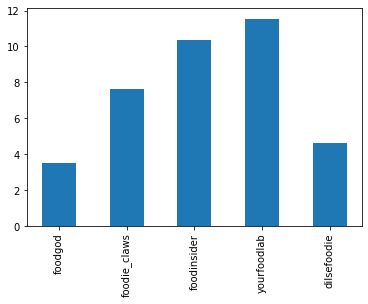

In [80]:
#plotting the bar graph to depict the average followers : likes ratio for the obtained handles
x=list(ratio_dic.keys())
y=list(ratio_dic.values())
plt.bar(x,y,width=0.5)
plt.xticks(rotation=90)
plt.show()